In [3]:
import os
import requests, bs4
import json
import folium as fm
import pandas as pd
import numpy as np
import geopandas as gpd
import param
import panel as pn
import param as pm
import random
from fastkml.kml import KML
pn.extension(sizing_mode="stretch_width")

In [56]:
wi_df = pd.read_csv('./Static Data/Walkability Index.csv')

In [57]:
wi_df.head()

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,NatWalkInd
0,48,113,7825,4,14.000000
1,48,113,7825,2,10.833333
2,48,113,7825,3,8.333333
3,48,113,7824,1,15.666667
4,48,113,7824,2,10.166667


In [3]:
request = requests.get('https://geocoding.geo.census.gov/geocoder/geographies/address?street=1250%20Garden%20rd&city=monterey&state=ca&zip=93940&benchmark=2020&vintage=2020&format=JSON')
request.text

'{"result":{"input":{"address":{"zip":"93940","city":"monterey","street":"1250 Garden rd","state":"ca"},"vintage":{"isDefault":true,"id":"2020","vintageName":"Census2020_Census2020","vintageDescription":"Census 2020 Vintage - Census 2020 Benchmark"},"benchmark":{"isDefault":false,"benchmarkDescription":"Public Address Ranges - Census 2020 Benchmark","id":"2020","benchmarkName":"Public_AR_Census2020"}},"addressMatches":[{"tigerLine":{"side":"L","tigerLineId":"635500331"},"geographies":{"State Legislative Districts - Upper":[{"POP100":"","GEOID":"06017","CENTLAT":"+35.9583731","AREAWATER":2489341562,"STATE":"06","BASENAME":"17","OID":212904690192840,"LSADC":"LU","SLDU":"017","FUNCSTAT":"N","INTPTLAT":"+35.9662566","NAME":"State Senate District 17","OBJECTID":925,"CENTLON":"-120.9838511","LSY":"2018","HU100":"","AREALAND":18002094998,"INTPTLON":"-120.9903433","MTFCC":"G5210","LDTYP":"O"}],"States":[{"STATENS":"01779778","POP100":"","GEOID":"06","CENTLAT":"+37.1547578","AREAWATER":20294133

In [74]:
census_block = json.loads(request.text)
census_block['result']['geographies']['Census Blocks'][0]


{'SUFFIX': '',
 'POP100': '',
 'GEOID': '060530130001007',
 'CENTLAT': '+36.5976485',
 'BLOCK': '1007',
 'AREAWATER': 0,
 'STATE': '06',
 'BASENAME': '1007',
 'OID': 210701000076541,
 'LSADC': 'BK',
 'INTPTLAT': '+36.5976485',
 'FUNCSTAT': 'S',
 'NAME': 'Block 1007',
 'OBJECTID': 97912,
 'TRACT': '013000',
 'CENTLON': '-121.8733103',
 'BLKGRP': '1',
 'AREALAND': 85530,
 'HU100': '',
 'INTPTLON': '-121.8733103',
 'MTFCC': 'G5040',
 'LWBLKTYP': 'L',
 'UR': '',
 'COUNTY': '053'}

In [86]:
STATEFP = census_block['result']['geographies']['Census Blocks'][0]['STATE']
COUNTYFP = census_block['result']['geographies']['Census Blocks'][0]['COUNTY']
TRACTCE = census_block['result']['geographies']['Census Blocks'][0]['TRACT']
BLKGRPCE = census_block['result']['geographies']['Census Blocks'][0]['BLKGRP']
nps_wi = wi_df[(wi_df['STATEFP'] == float(STATEFP)) &
              (wi_df['COUNTYFP'] == float(COUNTYFP)) &
              (wi_df['TRACTCE'] == float(TRACTCE)) &
              (wi_df['BLKGRPCE'] == float(BLKGRPCE))
              ]['NatWalkInd'].values[0]
nps_wi

17.0

In [49]:
lat = nps_grid[0]
lon = nps_grid[1]
request = requests.get('https://geocoding.geo.census.gov/geocoder/geographies/coordinates?x=%f&y=%f&benchmark=2020&vintage=2020&format=JSON'% 
                       (lon,lat))
request.text

'{"result":{"geographies":{"State Legislative Districts - Upper":[{"POP100":"","GEOID":"06017","CENTLAT":"+35.9583731","AREAWATER":2489341562,"STATE":"06","BASENAME":"17","OID":212904690192840,"LSADC":"LU","SLDU":"017","FUNCSTAT":"N","INTPTLAT":"+35.9662566","NAME":"State Senate District 17","OBJECTID":925,"CENTLON":"-120.9838511","LSY":"2018","HU100":"","AREALAND":18002094998,"INTPTLON":"-120.9903433","MTFCC":"G5210","LDTYP":"O"}],"States":[{"STATENS":"01779778","POP100":"","GEOID":"06","CENTLAT":"+37.1547578","AREAWATER":20294133830,"STATE":"06","BASENAME":"California","STUSAB":"CA","OID":2749018475066,"LSADC":"00","FUNCSTAT":"A","INTPTLAT":"+37.1551773","DIVISION":"9","NAME":"California","REGION":"4","OBJECTID":36,"CENTLON":"-119.5277715","AREALAND":403671196038,"INTPTLON":"-119.5434183","HU100":"","MTFCC":"G4000","UR":""}],"County Subdivisions":[{"COUSUB":"92970","POP100":"","GEOID":"0605392970","CENTLAT":"+36.6466422","AREAWATER":318323432,"STATE":"06","BASENAME":"Seaside-Monterey

In [31]:
data = open('./Static Data/airports.kml').read()

In [16]:
def read_kml(fname='ss.kml'):
    kml = KML()
    kml.from_string(open(fname).read())
    points = dict()
    for feature in kml.features():
        for placemark in feature.features():
            points.update({placemark.name:
                        (placemark.geometry.y, placemark.geometry.x, )})
    return points


fname = './Static Data/airports.kml'
locations = read_kml(fname)

(39.135833, -121.436389)

In [41]:
nps_grid = (36.5964368,-121.8740501)
center_points = set()
for k in [-1,1]:
    for l in [-1,1]:
        for i in range(15):
            for j in range(15):
                if i and j == 0:
                    pass
                center_points.add((nps_grid[0]+l*i*0.02, nps_grid[1]+k*j*0.02))
center_points

{(36.3164368, -122.1540501),
 (36.3164368, -122.13405010000001),
 (36.3164368, -122.1140501),
 (36.3164368, -122.0940501),
 (36.3164368, -122.07405010000001),
 (36.3164368, -122.05405010000001),
 (36.3164368, -122.0340501),
 (36.3164368, -122.0140501),
 (36.3164368, -121.99405010000001),
 (36.3164368, -121.9740501),
 (36.3164368, -121.9540501),
 (36.3164368, -121.93405010000001),
 (36.3164368, -121.91405010000001),
 (36.3164368, -121.8940501),
 (36.3164368, -121.8740501),
 (36.3164368, -121.85405010000001),
 (36.3164368, -121.8340501),
 (36.3164368, -121.8140501),
 (36.3164368, -121.7940501),
 (36.3164368, -121.77405010000001),
 (36.3164368, -121.7540501),
 (36.3164368, -121.7340501),
 (36.3164368, -121.71405010000001),
 (36.3164368, -121.6940501),
 (36.3164368, -121.6740501),
 (36.3164368, -121.6540501),
 (36.3164368, -121.63405010000001),
 (36.3164368, -121.6140501),
 (36.3164368, -121.5940501),
 (36.3364368, -122.1540501),
 (36.3364368, -122.13405010000001),
 (36.3364368, -122.11405

In [48]:
#Citation Karin, Todd. Global Land Mask. October 5, 2020. https://doi.org/10.5281/zenodo.4066722
from global_land_mask import globe
land_centers = set()
for point in center_points:
    if globe.is_land(point[0],point[1]):
        land_centers.add(point)
len(land_centers)

424

In [94]:
for i in range(5):
    point = list(land_centers)[i]
    print(point)
    request = requests.get('https://geocoding.geo.census.gov/geocoder/geographies/coordinates?x=%f&y=%f&benchmark=2020&vintage=2020&format=JSON'% 
                       (point[1],point[0]))
    census_block = json.loads(request.text)
    print(census_block['result']['geographies']['Census Blocks'][0])
    STATEFP = census_block['result']['geographies']['Census Blocks'][0]['STATE']
    COUNTYFP = census_block['result']['geographies']['Census Blocks'][0]['COUNTY']
    TRACTCE = census_block['result']['geographies']['Census Blocks'][0]['TRACT']
    BLKGRPCE = census_block['result']['geographies']['Census Blocks'][0]['BLKGRP']
    try:
        wi = wi_df[(wi_df['STATEFP'] == float(STATEFP)) &
                      (wi_df['COUNTYFP'] == float(COUNTYFP)) &
                      (wi_df['TRACTCE'] == float(TRACTCE)) &
                      (wi_df['BLKGRPCE'] == float(BLKGRPCE))
                  ]['NatWalkInd'].values[0]
    except:
        pass
    print(wi)

(36.7164368, -121.5940501)
{'SUFFIX': '', 'POP100': '', 'GEOID': '060530106061033', 'CENTLAT': '+36.7035833', 'BLOCK': '1033', 'AREAWATER': 1568, 'STATE': '06', 'BASENAME': '1033', 'OID': 210701000080969, 'LSADC': 'BK', 'INTPTLAT': '+36.7046927', 'FUNCSTAT': 'S', 'NAME': 'Block 1033', 'OBJECTID': 5004084, 'TRACT': '010606', 'CENTLON': '-121.5900060', 'BLKGRP': '1', 'AREALAND': 4463030, 'HU100': '', 'INTPTLON': '-121.5899645', 'MTFCC': 'G5040', 'LWBLKTYP': 'B', 'UR': '', 'COUNTY': '053'}
7.666666667
(36.8564368, -121.7940501)
{'SUFFIX': '', 'POP100': '', 'GEOID': '060530101013006', 'CENTLAT': '+36.8633244', 'BLOCK': '3006', 'AREAWATER': 9518, 'STATE': '06', 'BASENAME': '3006', 'OID': 210701000078671, 'LSADC': 'BK', 'INTPTLAT': '+36.8632609', 'FUNCSTAT': 'S', 'NAME': 'Block 3006', 'OBJECTID': 2544803, 'TRACT': '010101', 'CENTLON': '-121.7820592', 'BLKGRP': '3', 'AREALAND': 4566509, 'HU100': '', 'INTPTLON': '-121.7818922', 'MTFCC': 'G5040', 'LWBLKTYP': 'B', 'UR': '', 'COUNTY': '053'}
7.66

In [97]:
def get_map(lat=nps_grid[0], long=nps_grid[1], zoom_start=12):
    return fm.Map(location=[lat,long], zoom_start=zoom_start)

map = get_map()
fm.Marker(nps_grid, popup='NPS').add_to(map)
for i in range(len(land_centers)):
    point = list(land_centers)[i]
    request = requests.get('https://geocoding.geo.census.gov/geocoder/geographies/coordinates?x=%f&y=%f&benchmark=2020&vintage=2020&format=JSON'% 
                       (point[1],point[0]))
    census_block = json.loads(request.text)
    STATEFP = census_block['result']['geographies']['Census Blocks'][0]['STATE']
    COUNTYFP = census_block['result']['geographies']['Census Blocks'][0]['COUNTY']
    TRACTCE = census_block['result']['geographies']['Census Blocks'][0]['TRACT']
    BLKGRPCE = census_block['result']['geographies']['Census Blocks'][0]['BLKGRP']
    try:
        wi = wi_df[(wi_df['STATEFP'] == float(STATEFP)) &
                      (wi_df['COUNTYFP'] == float(COUNTYFP)) &
                      (wi_df['TRACTCE'] == float(TRACTCE)) &
                      (wi_df['BLKGRPCE'] == float(BLKGRPCE))
                      ]['NatWalkInd'].values[0]
        if wi > 15:
            fm.Marker(point, popup=wi).add_to(map)
    except:
        pass

class Selections(param.Parameterized):
    dropdown = pm.ObjectSelector(1,[x for x in range(30)])

dashboard = Selections(name='Housing Dashboard')

map

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

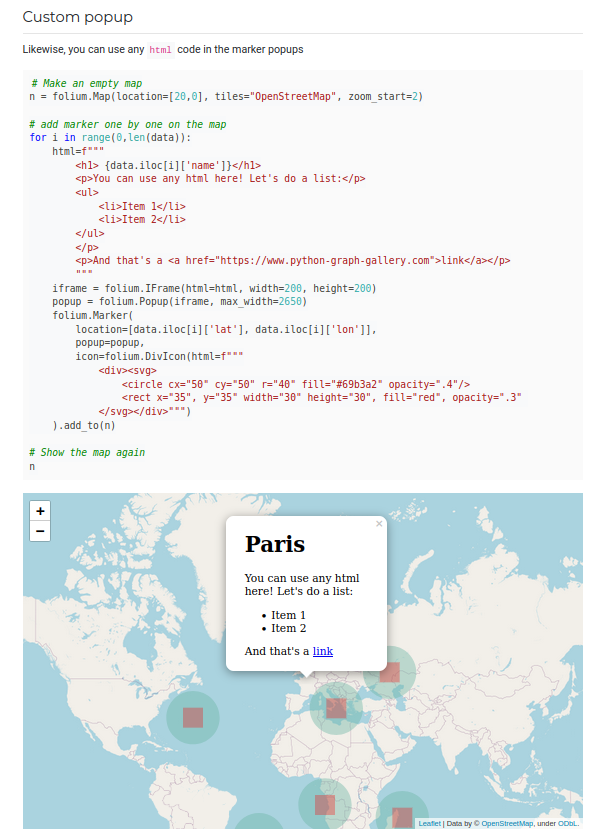

In [38]:
df = pd.DataFrame({'A':[x for x in range(4)],
                  'B': [x for x in range(10,14)]})
df_pane = pn.panel(df)
df_pane.show()

Launching server at http://localhost:41089


In [ ]:
gdb = './Static Data/Natl_WI.gdb/

In [28]:
gdb = './Static Data/Natl_WI.gdb/a00000009.gdbtable'

wi = gpd.read_file(gdb)

# Write to CSV 
#fc.to_csv('/path/to/out_csv.csv')

# Write to GeoJSON
#fc.to_file('./Static Data/Natl_WI.gdb/Walkability.geojson', driver='GeoJSON')

In [51]:
pd.set_option('display.max_columns', None)
wi[:1]

,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CSA_Name,CBSA,CBSA_Name,Ac_Total,Ac_Water,Ac_Land,Ac_Unpr,TotPop,CountHU,HH,Workers,D2B_E8MIXA,D2A_EPHHM,D3B,D4A,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area,geometry
0,481130078254,481130078254,48,113,007825,4,206,"Dallas-Fort Worth, TX-OK",19100,"Dallas-Fort Worth-Arlington, TX",73.595028,0.0,73.595028,73.595028,1202,460.0,423.0,412,0.662091,0.348912,115.981747,362.1,6.0,14.0,15.0,17.0,14.0,3110.36082,297836.08309,"MULTIPOLYGON (((-68983.316 1091325.734, -68981..."
